# Price elasticity - linear & nonlinear

In [1]:
import pandas as pd

df = pd.read_csv('price_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Price     1000 non-null   int64
 1   Quantity  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


<Axes: xlabel='Quantity', ylabel='Price'>

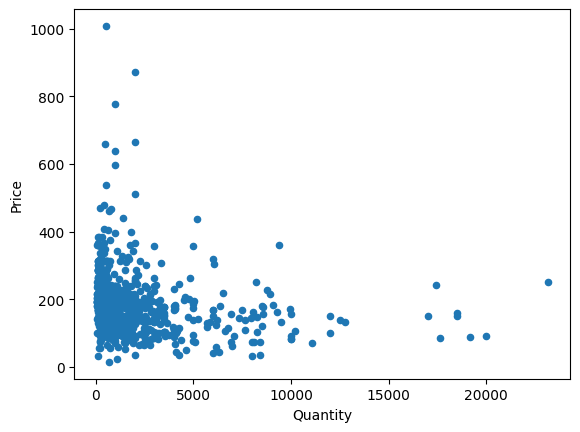

In [2]:
df.plot(x = "Quantity", y = "Price", kind = "scatter")

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1000.0,192.404,84.275947,15.0,145.0,187.0,216.0,1008.0
Quantity,1000.0,1611.900,2534.252992,60.0,300.0,700.0,1907.5,23150.0


While the relationship between price and quantity is not necessarily linear, we explore a linear regression demand function to examine how well the linear model performs. We analyze the coefficient to determine the linear price elasticity.

In [12]:
median_price = 187.0
median_quantity = 700.0

In [4]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

x_value = df['Price']
y_value = df['Quantity']
X = add_constant(x_value)
model = sm.OLS(y_value, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     51.14
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           1.66e-12
Time:                        10:44:35   Log-Likelihood:                -9231.1
No. Observations:                1000   AIC:                         1.847e+04
Df Residuals:                     998   BIC:                         1.848e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2889.2504    194.994     14.817      0.0

>> Null Hypothesis -> Price does not affect Quantity.

>> The small p-values (0.000) indicate we can reject the null hypothesis.

>> A low (adj.) R-squared value indicates our model cannot explain a lot of the response variability.



In [13]:
coeff = result.f_pvalue
intercept, slope = result.params

#Linear Price elasticity
price_elasticity = round((slope)*(median_price/median_quantity), 2)   #we've extreme values in variables

print('Linear Price Elasticity = {} with pvalue {}' .format(price_elasticity, coeff))


Linear Price Elasticity = -1.77 with pvalue 1.6641207951448687e-12


>> Quantity = m(price) + c where c = 2889.25 and m = -6.6389

> Observing that the price exhibits a power curve pattern, we utilize a non-linear model derived from a power regression demand function. By applying logarithmic functions and taking total differentials, we can determine the price elasticity.

> Other regression forms such as polynomial regression are also used to capture the complexity of price elasticity.

>> **Power Regression**

In [14]:
import numpy as np

x_value = np.log(df['Price'])
y_value = np.log(df['Quantity'])
X = add_constant(x_value)
model = sm.OLS(y_value, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           1.01e-32
Time:                        10:59:34   Log-Likelihood:                -1562.7
No. Observations:                1000   AIC:                             3129.
Df Residuals:                     998   BIC:                             3139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1370      0.449     27.027      0.0

>> We have an improved (adj.) R-squared, but it still indicates our model has room for further enhancement.

In [15]:
coeffN = result.f_pvalue
intercept, slope = result.params

#Non_linear Price elasticity
price_elasticity = round((slope), 2)
print('Non_linear Price Elasticity = {} with pvalue {}'.format(price_elasticity, coeffN))

Non_linear Price Elasticity = -1.07 with pvalue 1.0083563155906331e-32


> **Thus, a 1% increase in price results in a 1.07% decrease in demand.**

>> We fit the regression using a log function, so the intercept from the regression is log(c). To get the non-linear demand function, we apply the exp() method to return the value of c.

In [16]:
import math

round(math.exp(12.1370), 0)

186652.0

>> Quantity = 186652 * (price)**(1.07)

# Price optimization based on price elasticity

>> The goal is to recommend optimal price point for the business. We explore various price points to understand how demand and revenue fluctuate based on price elasticity and  demand function.

In [74]:
# Set price elasticity range
elasticity = -1.07

# Set price range
price = list(np.linspace(15, 1000, num = 100))
demand = 186652 * np.power(price, elasticity)
revenue = list(price  * demand)
max_revenue = np.max(revenue)
max_index = np.argmax(revenue)
price[max_index]

15.0

>> By using a price range between 15 and 1000, we see that the optimised price for highest revenue is $15, which is the lowest price point.

In [75]:
data = [price, revenue]
dff = pd.DataFrame(data)
price_df = pd.DataFrame(dff.T)

Rev = price_df[1]
Price = price_df[0]

(20000.0, 170000.0)

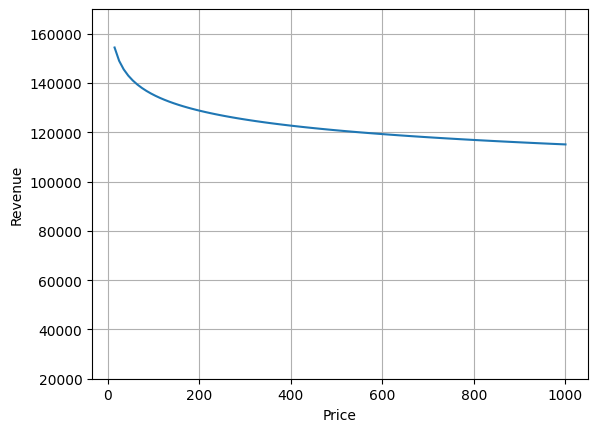

In [76]:
import matplotlib.pyplot as plt

plt.plot(Price, Rev)
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.grid()
plt.ylim(20000, 170000)

>> Beyond the $200 price, we see a smaller difference in the revenue earned.

> **Pricing strategy based on elasticity**

>> Elastic Demand: If a product has a high price elasticity, meaning that consumers are highly sensitive to changes in price, businesses may need to adopt a lower pricing strategy to attract more customers and increase sales. This could involve lowering the price of the product or offering discounts, coupons, or other promotional offers.

>> Inelastic Demand: If a product has a low price elasticity, meaning that consumers are relatively insensitive to changes in price, businesses may be able to adopt a higher pricing strategy without significantly reducing demand. This could involve raising the price of the product or offering premium features or services to justify a higher price point.

> Based on the present dataset, the business by adopting a lower price strategy can capitalize on the relatively elastic demand for the product to increase overall revenue.

# Simulation with various price elasticity keeping the intercept constant

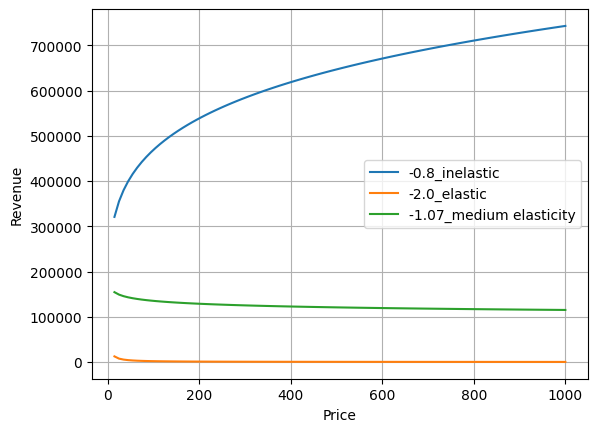

In [86]:
price = list(np.linspace(15, 1000, num = 100))

elasticity1 = -0.8                 #inelastic demand
demand1 = 186652 * np.power(price, elasticity1)        #nonlinear price elasticity
revenue1 = price  * demand1
max_revenue1 = np.max(revenue1)
max_index1 = np.argmax(revenue1)
#price[max_index1]

data1 = {'Price': price, 'Revenue': revenue1, 'Quantity': demand1}
price_df1 = pd.DataFrame(data1)

elasticity2 = -2.0                   #perfectly elastic demand
demand2 = 186652 * np.power(price, elasticity2)         #nonlinear price elasticity
revenue2 = price  * demand2
max_revenue2 = np.max(revenue2)
max_index2 = np.argmax(revenue2)
#price[max_index2]

data2 = {'Price': price, 'Revenue': revenue2, 'Quantity': demand2}
price_df2 = pd.DataFrame(data2)


elasticity = -1.07
demand = 186652 * np.power(price, elasticity)
revenue = list(price  * demand)
max_revenue = np.max(revenue)
max_index = np.argmax(revenue)
#price[max_index]

data = {'Price': price, 'Revenue': revenue, 'Quantity': demand}
price_df = pd.DataFrame(data)


final_price_df = price_df1.merge(price_df, left_on = 'Price', right_on = 'Price')\
                          .merge(price_df2, left_on = 'Price', right_on = 'Price')

final_price_df = final_price_df.rename(columns = {'Revenue_x':'-0.8_inelastic',\
                                                'Revenue':'-2.0_elastic',\
                                                 'Revenue_y':'-1.07_medium elasticity',
                                                    })[['Price','-0.8_inelastic','-2.0_elastic','-1.07_medium elasticity']].set_index('Price')

final_price_df.plot()
plt.ylabel('Revenue')
plt.grid()

> When greater elasticity is present, a higher discount is required to achieve revenue growth. On the other hand, inelasticity demonstrates revenue growth even when raising the price points.